In [1]:
import pandas as pd
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import pdblp
from datetime import datetime

In [2]:
con = pdblp.BCon()
con.start()
con.timeout = 30000 

In [3]:
sims = 10000
num_assets = 20
price_field = 'PX_LAST'
three_years_ago = (datetime.now() - pd.DateOffset(years=3)).strftime('%Y%m%d')
Risk_Free_Rate = 5.3859

In [4]:
nifty_500_df = pd.read_csv(r'C:\Users\Bloomberg 5\Desktop\Vikas Singh Projects\NSE500 as of Aug 06 20251.csv')

In [5]:
stock_symbols = nifty_500_df['Ticker']

In [6]:
million_stock_combinations = []

In [7]:
for i in range(0,sims,1) : 
    random_20_stocks = stock_symbols.sample(n=num_assets, random_state=i)
    million_stock_combinations.append(random_20_stocks)

In [8]:
random_numbers = np.random.rand(sims, num_assets)
weights = random_numbers / random_numbers.sum(axis=1)[:, np.newaxis]

In [9]:
best_portfolios = []

In [10]:
for i in range(0,sims,1):
    stock_list = million_stock_combinations[i].tolist()
    
    data = con.bdh(
    tickers=stock_list,
    flds=price_field,
    start_date=three_years_ago,
    end_date=datetime.now().strftime('%Y%m%d'))

    log_returns = np.log(data / data.shift(1))
    cov_matrix = log_returns.dropna().cov()

    avg_stock_return = log_returns.mean() * 250 * 100

    p_variance = np.diag(weights @ cov_matrix @ weights.T)

    sd_portfolio= np.sqrt(p_variance) * np.sqrt(250) * 100

    rt_portfolio = weights @ avg_stock_return.T

    graph_values = {
    'Standard Deviation': sd_portfolio,
    'Expected Return': rt_portfolio}
    efficient_set = pd.DataFrame(graph_values)
    efficient_set_sorted = efficient_set.sort_values(by='Standard Deviation')
    efficient_set_sorted['frontier_y'] = efficient_set_sorted['Expected Return'].cummax()

    result = efficient_set_sorted[efficient_set_sorted['Expected Return'] == efficient_set_sorted['frontier_y']][['Standard Deviation', 'Expected Return']] 

    best_portfolios.append(result)

In [11]:
best_portfolios_c = pd.concat(best_portfolios, ignore_index=True)
best_portfolios_sorted = best_portfolios_c.sort_values(by='Standard Deviation')
best_portfolios_sorted['frontier_y'] = best_portfolios_sorted['Expected Return'].cummax()

In [12]:
best_of_best_portfolios = best_portfolios_sorted[best_portfolios_sorted['Expected Return'] == best_portfolios_sorted['frontier_y']][['Standard Deviation', 'Expected Return']]

In [13]:
print(best_of_best_portfolios)

        Standard Deviation  Expected Return
112704           11.317122        14.858408
112705           11.453855        15.649527
112706           11.566476        15.918936
112707           11.686176        17.889301
112708           12.007993        18.014468
112709           12.052475        18.119154
112710           12.060344        18.701375
112711           12.217548        18.719374
112712           12.398902        19.151656
112713           12.429767        19.701620
112714           12.574509        19.877867
119248           12.656597        21.848509
200528           12.768490        23.289945
200529           12.790783        24.965108
162875           12.969096        25.509951
29396            13.114677        26.592427
144131           13.449153        27.425814
144132           13.563025        28.973047
66029            13.892593        30.373116
66030            14.093779        30.499162
144136           14.174574        30.557483
179403           14.186692      

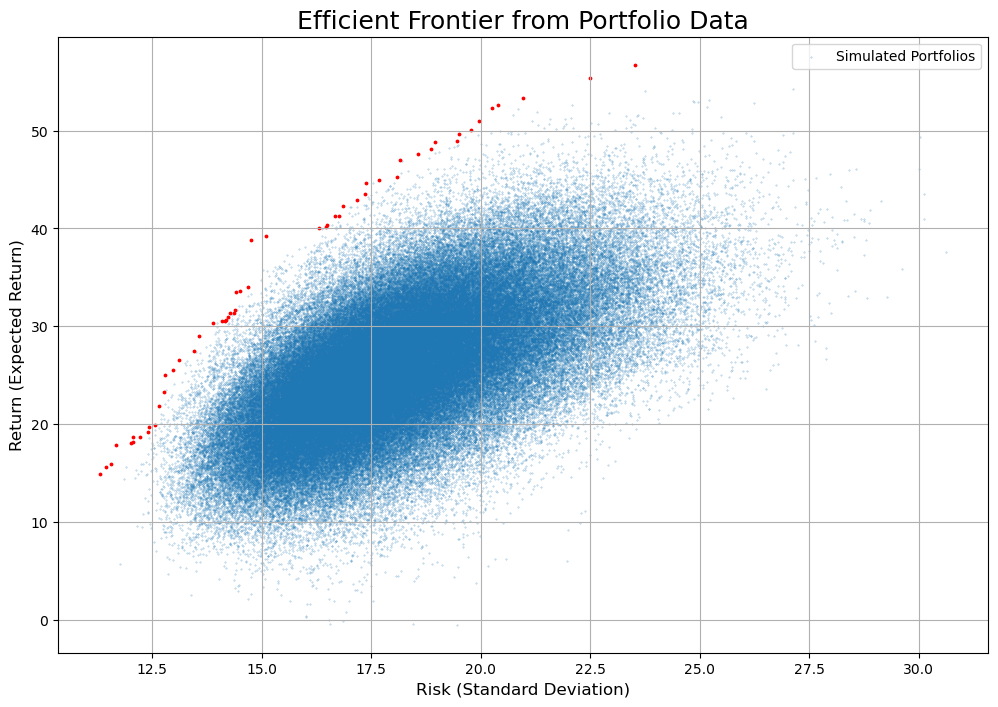

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(
    best_portfolios_c.iloc[:, 0],
    best_portfolios_c.iloc[:, 1],
    s=0.1,
    alpha=0.5,
    label='Simulated Portfolios'
)
#plt.plot(
   # best_of_best_portfolios['Standard Deviation'],
   # best_of_best_portfolios['frontier_y'],
   # color='red',
    #linestyle='-',
    #linewidth=1,
    #label='Efficient Frontier')
plt.scatter(
    best_of_best_portfolios['Standard Deviation'],
    best_of_best_portfolios['Expected Return'],
    c='red',
    s=3,
    alpha=1,
)
plt.title('Efficient Frontier from Portfolio Data', fontsize=18)
plt.xlabel('Risk (Standard Deviation)', fontsize=12)
plt.ylabel('Return (Expected Return)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()